[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pinecone-io/examples/blob/master/learn/experimental/algos-and-libraries/bertopic/02_umap_notes.ipynb) [![Open nbviewer](https://raw.githubusercontent.com/pinecone-io/examples/master/assets/nbviewer-shield.svg)](https://nbviewer.org/github/pinecone-io/examples/blob/master/learn/experimental/algos-and-libraries/bertopic/02_umap_notes.ipynb)

In [1]:
from datasets import load_dataset

mnist = load_dataset('mnist')
mnist

Reusing dataset mnist (C:\Users\James\.cache\huggingface\datasets\mnist\mnist\1.0.0\fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [2]:
mnist['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x1A70F0E6B20>,
 'label': 5}

In [3]:
import numpy as np

mnist = mnist.map(lambda x: {
    'array': np.asarray(x['image']).reshape(-1)
})

Loading cached processed dataset at C:\Users\James\.cache\huggingface\datasets\mnist\mnist\1.0.0\fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4\cache-306c2b6ee427a8de.arrow
Loading cached processed dataset at C:\Users\James\.cache\huggingface\datasets\mnist\mnist\1.0.0\fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4\cache-f7f3f0579bcb2aa8.arrow


In [4]:
len(mnist['train'][0]['array'])

784

In [5]:
min(mnist['train'][0]['array']), max(mnist['train'][0]['array'])

(0, 255)

We should normalize to between *0* and *1*.

In [6]:
mnist = mnist.map(lambda x: {
    'array': np.asarray(x['array']) / 255.
})

Loading cached processed dataset at C:\Users\James\.cache\huggingface\datasets\mnist\mnist\1.0.0\fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4\cache-e5b473b49c2ff0fe.arrow
Loading cached processed dataset at C:\Users\James\.cache\huggingface\datasets\mnist\mnist\1.0.0\fda16c03c4ecfb13f165ba7e29cf38129ce035011519968cdaf74894ce91c9d4\cache-76bd7bc0c0ed879e.arrow


In [7]:
len(mnist['train'][0]['array'])

784

In [8]:
min(mnist['train'][0]['array']), max(mnist['train'][0]['array'])

(0.0, 1.0)

Our data is now ready for use.

### UMAP Dim Reduction

First we make sure UMAP is install with either:

```bash
conda install -c conda-forge umap-learn
```

*or*

```bash
pip install umap-learn
```

In [9]:
import umap

  0%|          | 0/9 [00:00<?, ?it/s]

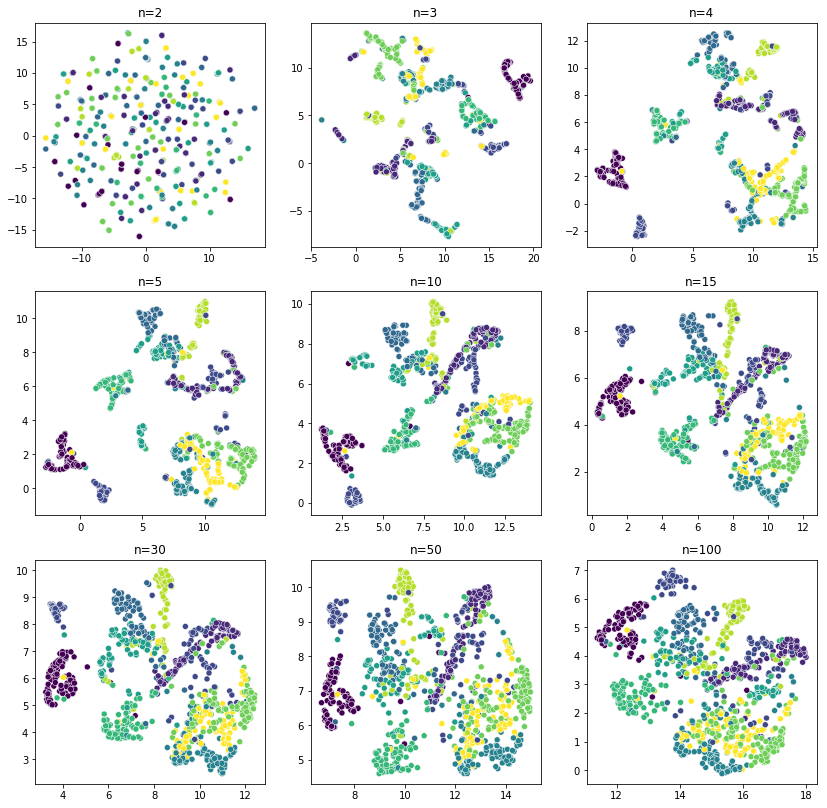

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(mnist['train']['array'][:1000])
    sns.scatterplot(x=u[:,0], y=u[:,1], c=mnist['train']['label'][:1000], ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

Lets compare these two PCA and t-SNE...

C:\Users\James\anaconda3\envs\stoic\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

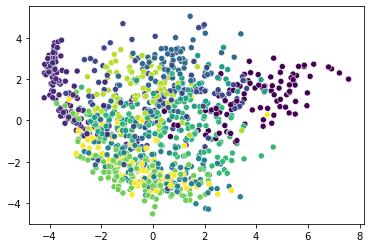

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # this means we will create 2-d space
p = pca.fit_transform(mnist['train']['array'][:1000])
sns.scatterplot(p[:,0], p[:,1], c=mnist['train']['label'][:1000])

  0%|          | 0/9 [00:00<?, ?it/s]

C:\Users\James\anaconda3\envs\stoic\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\James\anaconda3\envs\stoic\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\James\anaconda3\envs\stoic\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\James\anaconda3\envs\stoic\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\James\anaconda3\envs\stoic\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\James\anaconda3\e

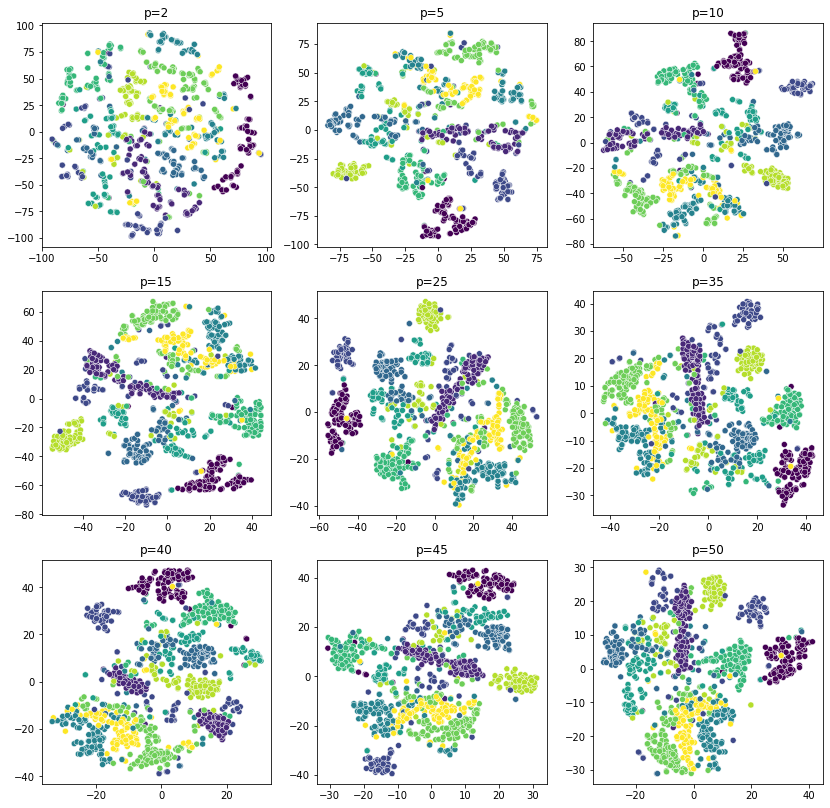

In [35]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
pps = [2, 5, 10, 15, 25, 35, 40, 45, 50]
i, j = 0, 0
for perplexity in tqdm(pps):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    t = tsne.fit_transform(mnist['train']['array'][:1000])
    sns.scatterplot(x=t[:,0], y=t[:,1], c=mnist['train']['label'][:1000], ax=ax[j, i])
    ax[j, i].set_title(f'p={perplexity}')
    if i < 2: i += 1
    else: i = 0; j += 1

Note that t-SNE seems to move all over the place, there is a lot of randomness in t-SNE, which is a key reason people don't like it. It also scales terribly and becomes very inefficient when reducing to more than 2-3 dimensions.